In [1]:
#taken from kaggle site:-
#https://www.kaggle.com/ishanvardhan/black-friday-sales-analysis-and-prediction

In [2]:
#import files
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Load training dataset
df_train=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ABC_train.csv")
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df_train.shape

(550068, 12)

In [7]:
#Load test dataset
df_test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ABC_test.csv")
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [9]:
df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [10]:
df_train['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

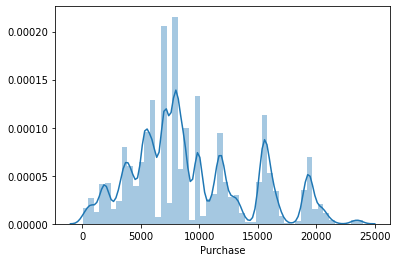

In [11]:
sns.distplot(df_train['Purchase']);

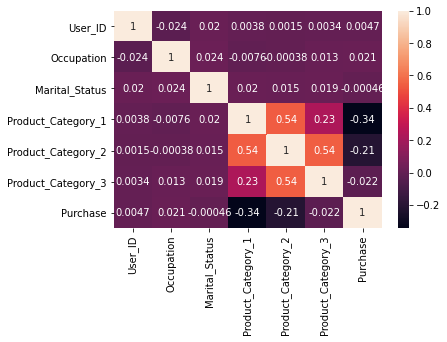

In [12]:
sns.heatmap(df_train.corr(),annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


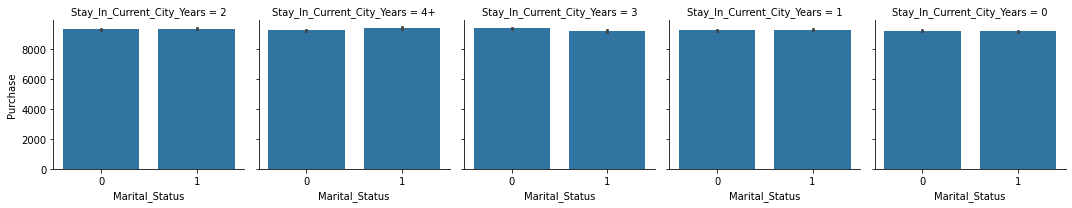

In [13]:
g = sns.FacetGrid(df_train,col="Stay_In_Current_City_Years")
g.map(sns.barplot, "Marital_Status", "Purchase");

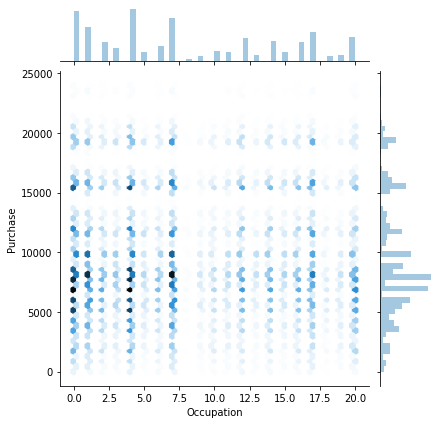

In [14]:
sns.jointplot(x='Occupation',y='Purchase',data=df_train, kind='hex')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


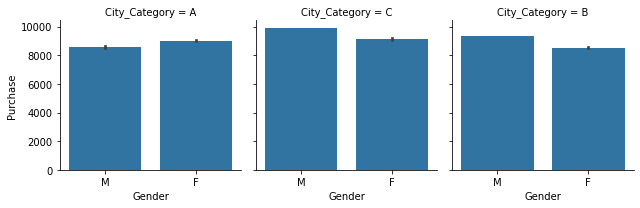

In [15]:
g = sns.FacetGrid(df_train,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


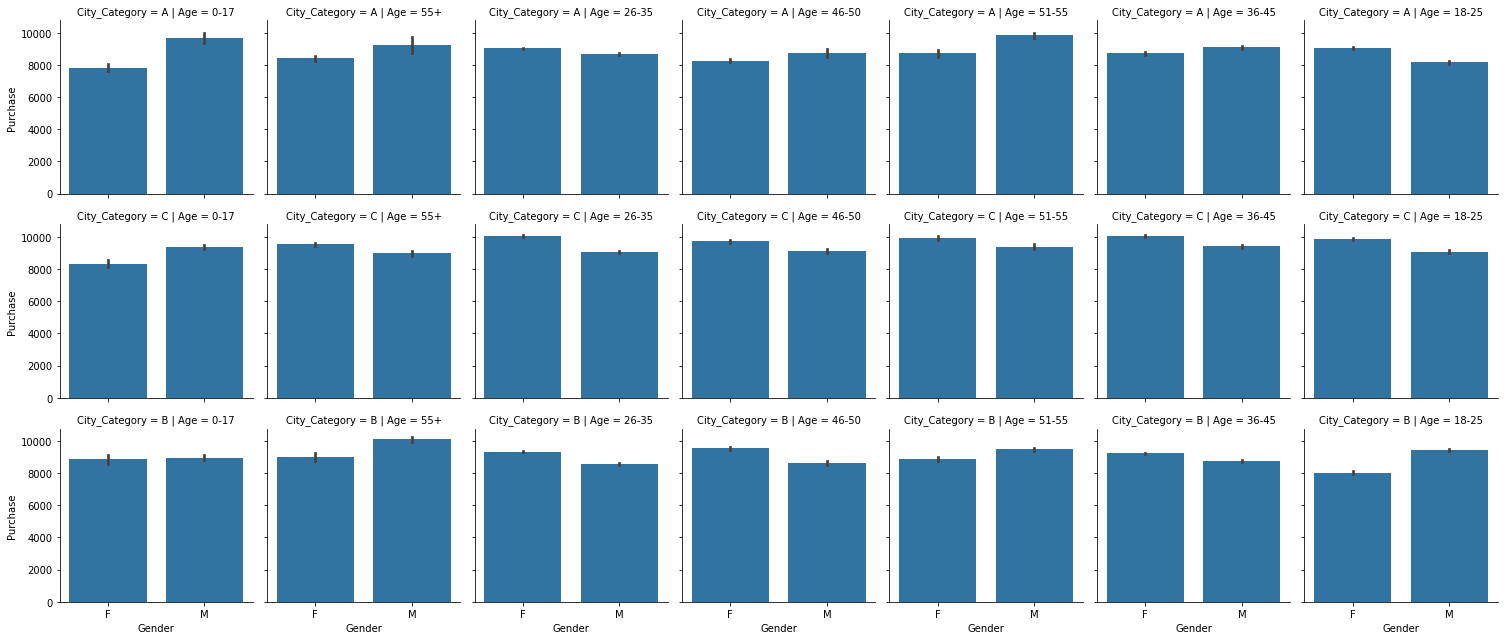

In [16]:
g = sns.FacetGrid(df_train,col="Age",row="City_Category")
g.map(sns.barplot, "Gender", "Purchase");

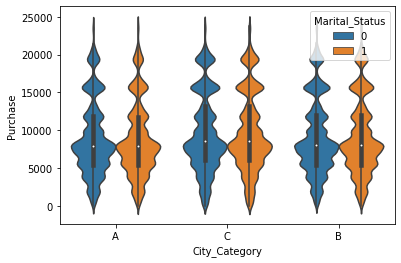

In [17]:
sns.violinplot(x='City_Category',y='Purchase',hue='Marital_Status',data=df_train)

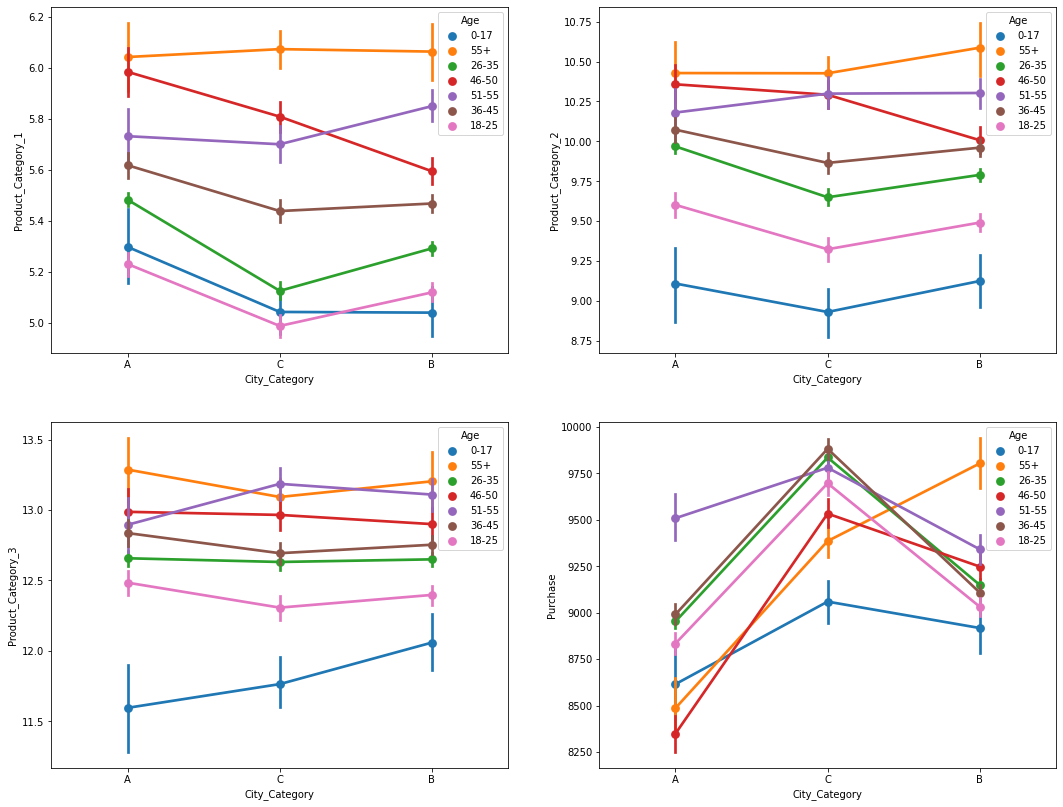

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.pointplot(y='Product_Category_1', x='City_Category',hue='Age',data=df_train,ax=axes[0,0])
ax = sns.pointplot(y='Product_Category_2', x='City_Category',hue='Age',data=df_train,ax=axes[0,1])
ax = sns.pointplot(y='Product_Category_3', x='City_Category', hue='Age',data=df_train,ax=axes[1,0])
ax = sns.pointplot(y='Purchase', x='City_Category', hue='Age',data=df_train,ax=axes[1,1])

In [19]:
df_combine = pd.concat([df_train.drop(['Purchase'], axis=1), df_test], axis=0)
df_combine

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [20]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000


In [21]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 71.7+ MB


In [22]:
#replace missing values with mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df_combine.iloc[:, 9:11].values, y=None)
df_combine.iloc[:,9:11] = imputer.transform(df_combine.iloc[:, 9:11].values)
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 71.7+ MB


In [23]:
df_combine.drop(['User_ID','Product_ID'], axis=1, inplace=True)
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 59.8+ MB


In [24]:
df_combine

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2,0,3,9.844506,12.668605
1,F,0-17,10,A,2,0,1,6.000000,14.000000
2,F,0-17,10,A,2,0,12,9.844506,12.668605
3,F,0-17,10,A,2,0,12,14.000000,12.668605
4,M,55+,16,C,4+,0,8,9.844506,12.668605
...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4+,1,8,9.844506,12.668605
233595,F,26-35,15,B,4+,1,5,8.000000,12.668605
233596,F,26-35,15,B,4+,1,1,5.000000,12.000000
233597,F,46-50,1,C,4+,0,10,16.000000,12.668605


In [25]:
df_combine['Age']=(df_combine['Age'].str.strip('+'))

In [26]:
df_combine['Stay_In_Current_City_Years']=(df_combine['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [27]:
df_combine

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2.0,0,3,9.844506,12.668605
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000
2,F,0-17,10,A,2.0,0,12,9.844506,12.668605
3,F,0-17,10,A,2.0,0,12,14.000000,12.668605
4,M,55,16,C,4.0,0,8,9.844506,12.668605
...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4.0,1,8,9.844506,12.668605
233595,F,26-35,15,B,4.0,1,5,8.000000,12.668605
233596,F,26-35,15,B,4.0,1,1,5.000000,12.000000
233597,F,46-50,1,C,4.0,0,10,16.000000,12.668605


In [28]:
# checking for any null value left
df_combine.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [29]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  float64
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 59.8+ MB


In [30]:
combine_dummies = pd.get_dummies(df_combine)

In [31]:
df_combine

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,F,0-17,10,A,2.0,0,3,9.844506,12.668605
1,F,0-17,10,A,2.0,0,1,6.000000,14.000000
2,F,0-17,10,A,2.0,0,12,9.844506,12.668605
3,F,0-17,10,A,2.0,0,12,14.000000,12.668605
4,M,55,16,C,4.0,0,8,9.844506,12.668605
...,...,...,...,...,...,...,...,...,...
233594,F,26-35,15,B,4.0,1,8,9.844506,12.668605
233595,F,26-35,15,B,4.0,1,5,8.000000,12.668605
233596,F,26-35,15,B,4.0,1,1,5.000000,12.000000
233597,F,46-50,1,C,4.0,0,10,16.000000,12.668605


In [32]:
result = combine_dummies.values

In [33]:
result

array([[10.,  2.,  0., ...,  1.,  0.,  0.],
       [10.,  2.,  0., ...,  1.,  0.,  0.],
       [10.,  2.,  0., ...,  1.,  0.,  0.],
       ...,
       [15.,  4.,  1., ...,  0.,  1.,  0.],
       [ 1.,  4.,  0., ...,  0.,  0.,  1.],
       [ 0.,  4.,  1., ...,  0.,  1.,  0.]])

In [34]:
y = df_train['Purchase'].values

In [35]:
#creating matrices for sklearn:
X = result[:df_train.shape[0]]
test_values = result[df_train.shape[0]:]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
X_train

array([[ 7.,  4.,  1., ...,  0.,  0.,  1.],
       [14.,  2.,  0., ...,  0.,  1.,  0.],
       [ 7.,  4.,  0., ...,  0.,  0.,  1.],
       ...,
       [15.,  1.,  1., ...,  0.,  0.,  1.],
       [ 4.,  0.,  1., ...,  1.,  0.,  0.],
       [17.,  0.,  0., ...,  0.,  0.,  1.]])

In [38]:
X_test

array([[ 0.,  3.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [11.,  2.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3.,  0., ...,  0.,  1.,  0.],
       [ 7.,  1.,  1., ...,  0.,  1.,  0.],
       [11.,  1.,  0., ...,  0.,  1.,  0.]])

In [39]:
y_train

array([ 8109, 10071,  2290, ...,  6991, 13251,  9905])

In [40]:
y_test

array([15228,  1088, 16426, ..., 19456, 19586, 16544])

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_train = LabelEncoder()
X_train

array([[ 7.,  4.,  1., ...,  0.,  0.,  1.],
       [14.,  2.,  0., ...,  0.,  1.,  0.],
       [ 7.,  4.,  0., ...,  0.,  0.,  1.],
       ...,
       [15.,  1.,  1., ...,  0.,  0.,  1.],
       [ 4.,  0.,  1., ...,  1.,  0.,  0.],
       [17.,  0.,  0., ...,  0.,  0.,  1.]])

In [42]:
X_train[:, 0] = labelencoder_X_train.fit_transform(X_train[:, 0])
X_train

array([[ 7.,  4.,  1., ...,  0.,  0.,  1.],
       [14.,  2.,  0., ...,  0.,  1.,  0.],
       [ 7.,  4.,  0., ...,  0.,  0.,  1.],
       ...,
       [15.,  1.,  1., ...,  0.,  0.,  1.],
       [ 4.,  0.,  1., ...,  1.,  0.,  0.],
       [17.,  0.,  0., ...,  0.,  0.,  1.]])

In [43]:
X_train[:, 1] = labelencoder_X_train.fit_transform(X_train[:, 1])
X_train

array([[ 7.,  4.,  1., ...,  0.,  0.,  1.],
       [14.,  2.,  0., ...,  0.,  1.,  0.],
       [ 7.,  4.,  0., ...,  0.,  0.,  1.],
       ...,
       [15.,  1.,  1., ...,  0.,  0.,  1.],
       [ 4.,  0.,  1., ...,  1.,  0.,  0.],
       [17.,  0.,  0., ...,  0.,  0.,  1.]])

In [44]:
X_train[:, 3] = labelencoder_X_train.fit_transform(X_train[:, 3])
X_train

array([[ 7.,  4.,  1., ...,  0.,  0.,  1.],
       [14.,  2.,  0., ...,  0.,  1.,  0.],
       [ 7.,  4.,  0., ...,  0.,  0.,  1.],
       ...,
       [15.,  1.,  1., ...,  0.,  0.,  1.],
       [ 4.,  0.,  1., ...,  1.,  0.,  0.],
       [17.,  0.,  0., ...,  0.,  0.,  1.]])

In [45]:
labelencoder_X_test = LabelEncoder()
X_test

array([[ 0.,  3.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [11.,  2.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3.,  0., ...,  0.,  1.,  0.],
       [ 7.,  1.,  1., ...,  0.,  1.,  0.],
       [11.,  1.,  0., ...,  0.,  1.,  0.]])

In [46]:
X_test[:, 0] = labelencoder_X_test.fit_transform(X_test[:, 0])
X_test

array([[ 0.,  3.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [11.,  2.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3.,  0., ...,  0.,  1.,  0.],
       [ 7.,  1.,  1., ...,  0.,  1.,  0.],
       [11.,  1.,  0., ...,  0.,  1.,  0.]])

In [47]:
X_test[:, 1] = labelencoder_X_test.fit_transform(X_test[:, 1])
X_test

array([[ 0.,  3.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [11.,  2.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3.,  0., ...,  0.,  1.,  0.],
       [ 7.,  1.,  1., ...,  0.,  1.,  0.],
       [11.,  1.,  0., ...,  0.,  1.,  0.]])

In [48]:
X_test[:, 3] = labelencoder_X_test.fit_transform(X_test[:, 3])
X_test

array([[ 0.,  3.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [11.,  2.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0.,  3.,  0., ...,  0.,  1.,  0.],
       [ 7.,  1.,  1., ...,  0.,  1.,  0.],
       [11.,  1.,  0., ...,  0.,  1.,  0.]])

In [49]:
# Feature Scaling of training and test set
from sklearn.preprocessing import StandardScaler
sc_X_train = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)

sc_X_test = StandardScaler()
X_test = sc_X_test.fit_transform(X_test)

In [50]:
# compare MAE with differing values of max_leaf_nodes
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    return(mae)

In [51]:
for max_leaf_nodes in [5, 50, 100, 300, 500, 700, 800, 850]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2824
Max leaf nodes: 50  		 Mean Absolute Error:  2243
Max leaf nodes: 100  		 Mean Absolute Error:  2217
Max leaf nodes: 300  		 Mean Absolute Error:  2197
Max leaf nodes: 500  		 Mean Absolute Error:  2191
Max leaf nodes: 700  		 Mean Absolute Error:  2187
Max leaf nodes: 800  		 Mean Absolute Error:  2185
Max leaf nodes: 850  		 Mean Absolute Error:  2185


In [52]:
y_test

array([15228,  1088, 16426, ..., 19456, 19586, 16544])

In [53]:
regressor = RandomForestRegressor(n_estimators=700, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [54]:
y_train_pred = regressor.predict(X_train)

In [55]:
final_labels = regressor.predict(test_values)

In [56]:
final_labels

array([13015.13090476, 17488.04002721,   486.9642381 , ...,
       13539.23483333,   369.02670238,   364.81135034])

In [57]:
final_result = pd.DataFrame({'Purchase': final_labels,'User_ID': df_test['User_ID'], 'Product_ID': df_test['Product_ID']})

In [58]:
final_result.to_csv('submission_bfs.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [59]:
#upload submission
submission_bfs = pd.read_csv("submission_bfs.csv")
submission_bfs

,Purchase,User_ID,Product_ID
0,13015.130905,1000004,P00128942
1,17488.040027,1000009,P00113442
2,486.964238,1000010,P00288442
3,486.964238,1000010,P00145342
4,388.022500,1000011,P00053842
...,...,...,...
233594,398.738357,1006036,P00118942
233595,398.738357,1006036,P00254642
233596,13539.234833,1006036,P00031842
233597,369.026702,1006037,P00124742


In [60]:
#Load sample submission
sample_sub=pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_V9Inaty.csv")
sample_sub

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742
